In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_predict,validation_curve
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
test_df = pd.read_csv('../content/test.csv')
train_df = pd.read_csv('../content/train.csv')

FileNotFoundError: ignored

In [ ]:
test_df['Data']='Test'
train_df['Data']='Train'
both_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
both_df['subject'] = '#' + both_df['subject'].astype(str)

print('Shape Train:\t{}'.format(train_df.shape))
print('Shape Test:\t{}\n'.format(test_df.shape))


NameError: ignored

In [ ]:
both_df_s=both_df.drop(both_df.index[500:])

In [ ]:
both_df_s.shape

(500, 564)

In [ ]:
# Create label
label =both_df_s.pop('Activity')

In [ ]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in both_df_s.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [ ]:
both_df.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Data                    0
Length: 563, dtype: int64

In [ ]:
both_df['tBodyGyro-mean()-X']

0       -0.006101
1       -0.016112
2       -0.031698
3       -0.043410
4       -0.033960
           ...   
10294   -0.142473
10295    0.062107
10296   -0.123715
10297   -0.335912
10298   -0.208229
Name: tBodyGyro-mean()-X, Length: 10299, dtype: float64

In [ ]:
both_df_s.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.267481,-0.016837,-0.106280,-0.581390,-0.416733,-0.563485,-0.613848,-0.434239,-0.551985,-0.420504,...,0.167705,-0.301652,-0.606297,0.034773,0.011066,0.018333,-0.004681,-0.521624,0.103438,-0.046032
std,0.079501,0.048949,0.068655,0.394847,0.496553,0.375476,0.366464,0.480129,0.388320,0.512347,...,0.236020,0.353296,0.355753,0.337002,0.455837,0.598458,0.462761,0.432225,0.321721,0.202634
min,-0.361205,-0.684097,-1.000000,-0.999255,-0.998359,-0.999454,-0.999407,-0.998077,-0.999808,-0.971348,...,-0.800684,-0.944282,-0.999595,-0.939598,-0.964760,-0.992886,-0.994877,-0.884970,-0.817761,-0.980143
25%,0.258182,-0.024061,-0.122607,-0.994170,-0.975457,-0.983273,-0.994801,-0.975219,-0.983019,-0.936775,...,0.041993,-0.543871,-0.846753,-0.121352,-0.300479,-0.455472,-0.365103,-0.753172,0.018419,-0.132859
50%,0.276985,-0.017151,-0.108446,-0.440835,-0.192795,-0.442747,-0.491315,-0.206259,-0.438425,-0.256124,...,0.169814,-0.349255,-0.713482,0.013240,0.015974,0.034384,-0.010991,-0.697063,0.262193,0.040417
75%,0.288643,-0.008838,-0.092884,-0.281302,0.043264,-0.245435,-0.334787,0.009852,-0.238134,-0.066366,...,0.293097,-0.116397,-0.481961,0.192432,0.332842,0.499177,0.344863,-0.614989,0.294547,0.089045
max,0.469946,0.324130,0.346658,0.389135,0.532506,0.083796,0.257325,0.502260,0.195960,0.680338,...,0.918576,0.989538,0.956845,0.955207,0.990995,0.992677,0.941894,0.799174,0.367923,0.265795


In [ ]:
both_df.Data


0        Train
1        Train
2        Train
3        Train
4        Train
         ...  
10294     Test
10295     Test
10296     Test
10297     Test
10298     Test
Name: Data, Length: 10299, dtype: object

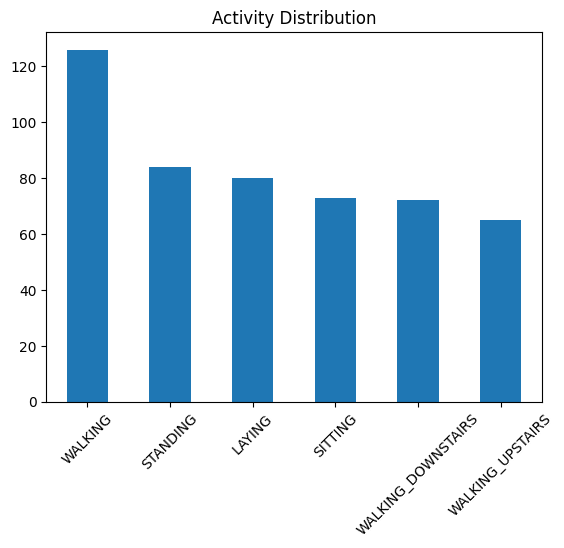

In [ ]:
label.value_counts().plot(kind='bar')
plt.title('Activity Distribution')
plt.xticks(rotation = 45)
plt.show()


In [ ]:
clean_df=both_df_s.drop(columns=['subject','Data'])

In [ ]:
print(clean_df)

     tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0             0.288585          -0.020294          -0.132905   
1             0.278419          -0.016411          -0.123520   
2             0.279653          -0.019467          -0.113462   
3             0.279174          -0.026201          -0.123283   
4             0.276629          -0.016570          -0.115362   
..                 ...                ...                ...   
495           0.359307          -0.037891          -0.140534   
496           0.356145           0.003389          -0.140635   
497           0.173312          -0.103529          -0.242073   
498           0.262486          -0.029029          -0.088647   
499           0.273951          -0.028793          -0.011273   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0           -0.995279         -0.983111         -0.913526         -0.995112   
1           -0.998245         -0.975300         -0.960322         -0.9988

In [ ]:
X=clean_df

In [ ]:
dict_map = {'LAYING':1 , 'STANDING': 2, 'SITTING': 3, 'WALKING': 4, 'WALKING_DOWNSTAIRS': 5, 'WALKING_UPSTAIRS': 6}
y = label.map(dict_map)

In [ ]:
print(y)

0      2
1      2
2      2
3      2
4      2
      ..
495    6
496    6
497    6
498    6
499    6
Name: Activity, Length: 500, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
X_train.info

<bound method DataFrame.info of      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
227           0.269635          -0.008931          -0.089395   
417           0.286841          -0.013721          -0.119283   
203           0.298118          -0.035647          -0.115930   
126           0.301715          -0.007049          -0.093681   
329           0.329553          -0.045810          -0.068693   
..                 ...                ...                ...   
106           0.308046          -0.023300          -0.079702   
270           0.296444           0.014086          -0.010259   
348           0.267318          -0.032355          -0.062924   
435           0.296585          -0.003157          -0.131543   
102           0.252425           0.006277          -0.125180   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
227         -0.997137         -0.966587         -0.985598         -0.997462   
417         -0.969547         -0.914033  

In [ ]:
#Create pipeline for Logistric Regression model
log_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression())
    ]
)
log_pipe

Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

In [ ]:
param_grid = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__multi_class' : ['multinomial'],
    'logreg__solver': ['newton-cg', 'saga','sag']
}

grid = GridSearchCV(log_pipe, param_grid, cv=5)
grid_log = grid.fit(X_train, y_train)

print('Parameters')
print(grid_log.best_params_)
print('')
print('Best Testing Score')
print(grid_log.best_score_)
print('')
print('Best Training Score')
print(grid_log.score(X_train,y_train))
print('')
print('Best Estimator')
print(grid_log.best_estimator_)
print('')
print('Avg Fit Time')
print(grid_log.cv_results_['mean_fit_time'].mean())

Parameters
{'logreg__C': 1, 'logreg__multi_class': 'multinomial', 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}

Best Testing Score
0.9946666666666667

Best Training Score
1.0

Best Estimator
Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=1, multi_class='multinomial',
                                    penalty='l1', solver='saga'))])

Avg Fit Time
0.5253414710362752


In [ ]:
#Create pipeline for Guassian NB model
gnb_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('gnb', GaussianNB())
    ]
)
gnb_pipe

Pipeline(steps=[('scaler', StandardScaler()), ('gnb', GaussianNB())])

In [ ]:
param_grid = {
        'gnb__priors': [None],
        'gnb__var_smoothing' : [0.00000001, 0.000000001, 0.00000001]
}

grid = GridSearchCV(gnb_pipe, param_grid, cv=5)
grid_gnb = grid.fit(X_train, y_train)

print('Parameters')
print(grid_gnb.best_params_)
print('')
print('Best Testing Score')
print(grid_gnb.best_score_)
print('')
print('Best Training Score')
print(grid_gnb.score(X_train,y_train))
print('')
print('Best Estimator')
print(grid_gnb.best_estimator_)
print('')
print('Avg Fit Time')
print(grid_gnb.cv_results_['mean_fit_time'].mean())

Parameters
{'gnb__priors': None, 'gnb__var_smoothing': 1e-08}

Best Testing Score
0.8800000000000001

Best Training Score
0.9066666666666666

Best Estimator
Pipeline(steps=[('scaler', StandardScaler()),
                ('gnb', GaussianNB(var_smoothing=1e-08))])

Avg Fit Time
0.018557151158650715


In [ ]:
#Create pipeline for KNN model
knn_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]
)
knn_pipe

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [ ]:
k_range = list(range(1,51,2))
leaf_range = list(range(1,31,2))
param_grid = {
    'knn__n_neighbors' : k_range,
    'knn__leaf_size' : leaf_range,
    'knn__weights' : ['uniform', 'distance']
}

grid = GridSearchCV(knn_pipe, param_grid)
grid_knn = grid.fit(X_train, y_train)

print('Parameters')
print(grid_knn.best_params_)
print('')
print('Best Testing Score')
print(grid_knn.best_score_)
print('')
print('Best Training Score')
print(grid_knn.score(X_train,y_train))
print('')
print('Best Estimator')
print(grid_knn.best_estimator_)
print('')
print('Avg Fit Time')
print(grid_knn.cv_results_['mean_fit_time'].mean())

Parameters
{'knn__leaf_size': 1, 'knn__n_neighbors': 1, 'knn__weights': 'uniform'}

Best Testing Score
0.96

Best Training Score
1.0

Best Estimator
Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(leaf_size=1, n_neighbors=1))])

Avg Fit Time
0.018923301506042482


In [ ]:
#Create pipeline for SVC model
svm_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('svm', SVC(probability=True))
    ]
)
svm_pipe

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(probability=True))])

In [ ]:
param_grid = {
              'svm__C': [0.1, 1, 10, 100, 1000],
              'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'svm__kernel': ['rbf','poly','sigmoid']
              }

grid = GridSearchCV(svm_pipe, param_grid)
grid_svm = grid.fit(X_train, y_train)

print('Parameters')
print(grid_svm.best_params_)
print('')
print('Best Testing Score')
print(grid_svm.best_score_)
print('')
print('Best Training Score')
print(grid_svm.score(X_train,y_train))
print('')
print('Best Estimator')
print(grid_svm.best_estimator_)
print('')
print('Avg Fit Time')
print(grid_svm.cv_results_['mean_fit_time'].mean())

Parameters
{'svm__C': 100, 'svm__gamma': 0.0001, 'svm__kernel': 'sigmoid'}

Best Testing Score
0.9946666666666667

Best Training Score
1.0

Best Estimator
Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 SVC(C=100, gamma=0.0001, kernel='sigmoid', probability=True))])

Avg Fit Time
0.11895427385965983


In [ ]:
results_log=cross_validate(log_pipe, X_train, y_train, return_train_score=True)
results_svm=cross_validate(svm_pipe, X_train, y_train, return_train_score=True)
results_knn=cross_validate(knn_pipe, X_train, y_train, return_train_score=True)
results_gnb=cross_validate(gnb_pipe, X_train, y_train, return_train_score=True)

In [ ]:
comp = ({
    'model':['Logistic Regression','SVM','kNN','GuassianNB'],
    'test score' :[grid_log.best_score_,grid_svm.best_score_,grid_knn.best_score_,grid_gnb.best_score_],
    'training score' :[grid_log.score(X_train, y_train),grid_svm.score(X_train, y_train),grid_knn.score(X_train, y_train),grid_gnb.score(X_train, y_train)],
    'average fit time':[results_log['fit_time'].mean(),results_svm['fit_time'].mean(),results_knn['fit_time'].mean(),results_gnb['fit_time'].mean()]
               })
pd.set_option('display.float_format', '{:.6f}'.format)
comp_df = pd.DataFrame(comp)
print(comp_df)

                 model  test score  training score  average fit time
0  Logistic Regression    0.994667        1.000000          0.406454
1                  SVM    0.994667        1.000000          0.177861
2                  kNN    0.960000        1.000000          0.016438
3           GuassianNB    0.880000        0.906667          0.017223


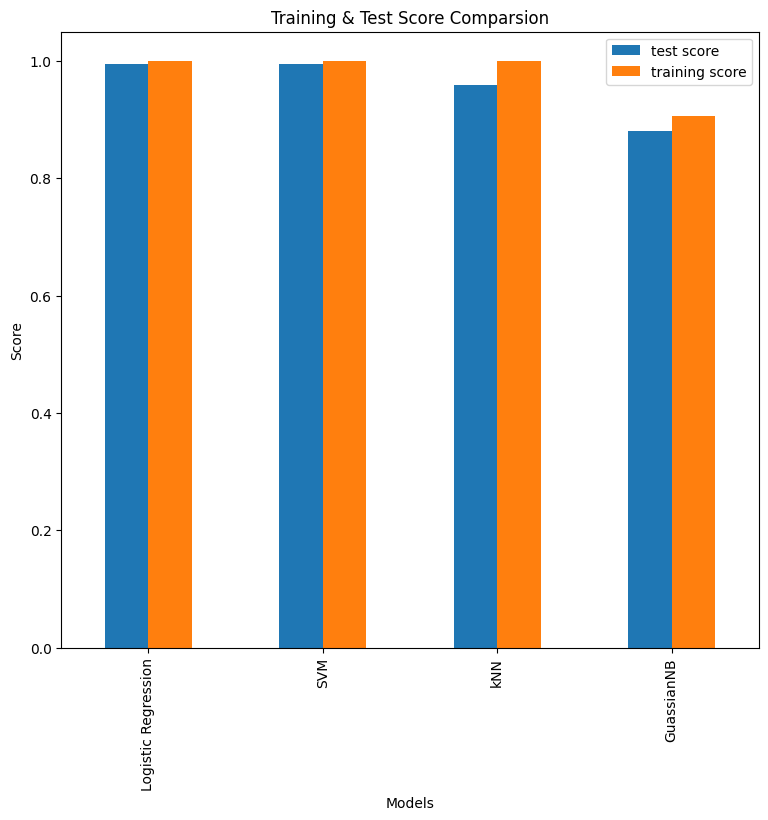

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(comp_df, columns=['model','test score', 'training score'])
df.plot(x='model', y=['test score', 'training score'], kind="bar", figsize=(9, 8))
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Training & Test Score Comparsion")
plt.legend(['test score', 'training score'])
plt.show()

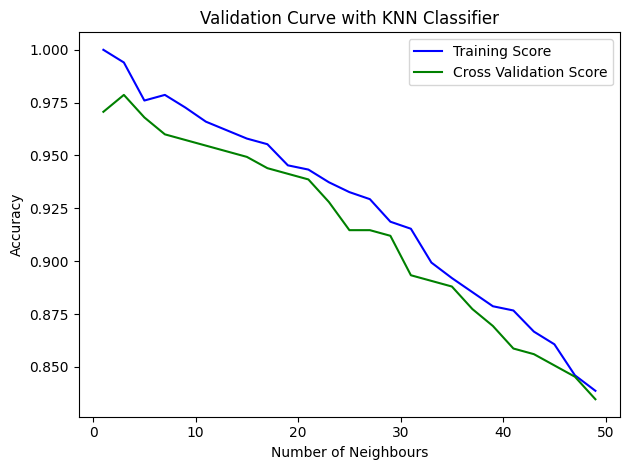

In [ ]:
parameter_range = np.arange(1, 51, 2)
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(KNeighborsClassifier(), X_train, y_train,
                                           param_name="n_neighbors",
                                           param_range=parameter_range,
                                           cv=5, scoring="accuracy")

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)

# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)

# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
         label="Training Score", color='b')
plt.plot(parameter_range, mean_test_score,
         label="Cross Validation Score", color='g')

# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc='best')
plt.show()


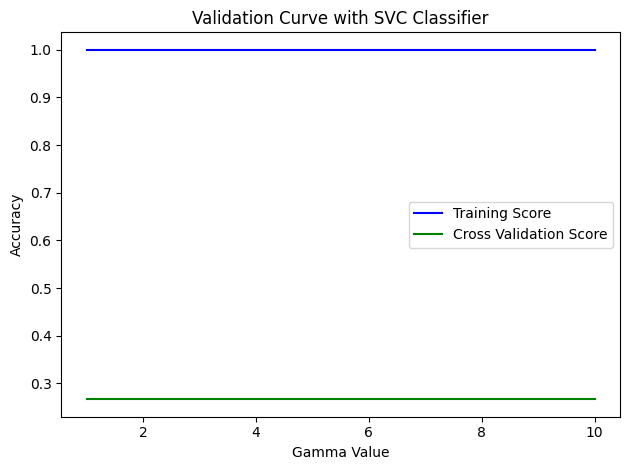

In [ ]:
parameter_range = np.logspace(0.0001,1,6)
print(parameter_range)
# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(SVC(), X_train, y_train,
                                           param_name="gamma",
                                           param_range=parameter_range,
                                           cv=5, scoring="accuracy")

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)

# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)

# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
         label="Training Score", color='b')
plt.plot(parameter_range, mean_test_score,
         label="Cross Validation Score", color='g')

# Creating the plot
plt.title("Validation Curve with SVC Classifier")
plt.xlabel("Gamma Value")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc='best')
plt.show()


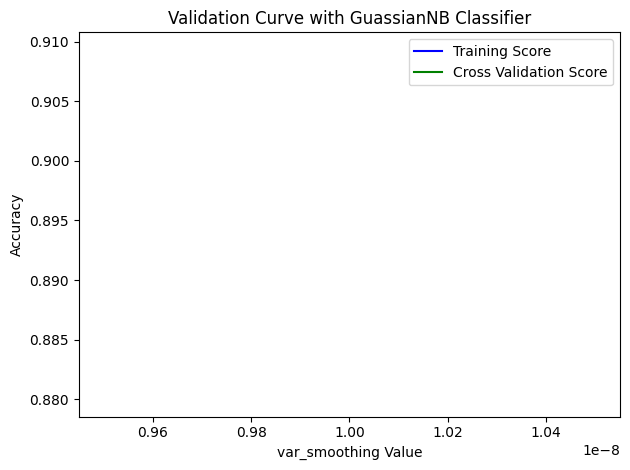

In [ ]:
parameter_range = np.arange(0.00000001,0.00001,0.00099 )

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(GaussianNB(), X_train, y_train,
                                           param_name="var_smoothing",
                                           param_range=parameter_range,
                                           cv=5, scoring="accuracy")

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis=1)
std_train_score = np.std(train_score, axis=1)

# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)

# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
         label="Training Score", color='b')
plt.plot(parameter_range, mean_test_score,
         label="Cross Validation Score", color='g')

# Creating the plot
plt.title("Validation Curve with GuassianNB Classifier")
plt.xlabel("var_smoothing Value")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [ ]:
accdf=both_df.filter(['tBodyAcc-mean()-X','tBodyAcc-mean()-Y','tBodyAcc-mean()-Z','Activity','subject'])

accdf

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,Activity,subject
0,0.288585,-0.020294,-0.132905,STANDING,#1
1,0.278419,-0.016411,-0.123520,STANDING,#1
2,0.279653,-0.019467,-0.113462,STANDING,#1
3,0.279174,-0.026201,-0.123283,STANDING,#1
4,0.276629,-0.016570,-0.115362,STANDING,#1
...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,WALKING_UPSTAIRS,#24
10295,0.363385,-0.039214,-0.105915,WALKING_UPSTAIRS,#24
10296,0.349966,0.030077,-0.115788,WALKING_UPSTAIRS,#24
10297,0.237594,0.018467,-0.096499,WALKING_UPSTAIRS,#24


In [ ]:
import plotly.express as px
sit=accdf[accdf['Activity']=='SITTING']
fig = px.scatter_3d(sit, x='tBodyAcc-mean()-X', y='tBodyAcc-mean()-Y', z='tBodyAcc-mean()-Z',color='subject')
fig.show()

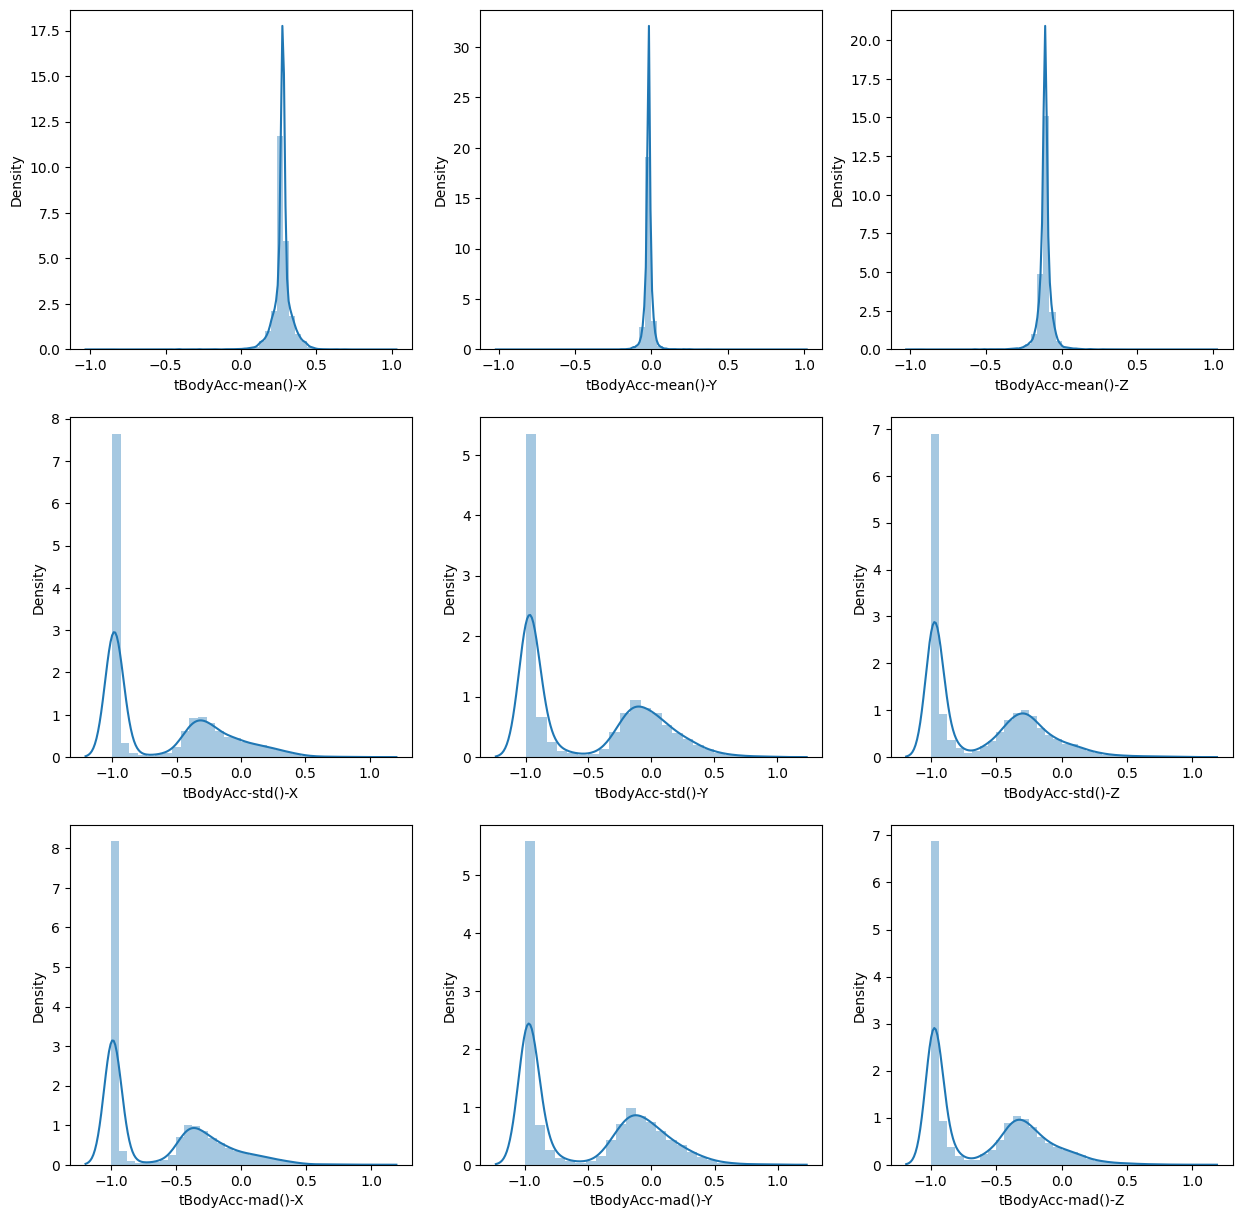

In [ ]:
def plot_distribution(data, col):
    fig, axes = plt.subplots(ncols = 3, nrows = 3, figsize = (15, 15))
    for i, ax in zip(range(9), axes.flat):
        sns.distplot(both_df[cols[i]], ax = ax)
    plt.show()

# Select some body acceleration attributes
cols = both_df.columns[:9]
plot_distribution(both_df, cols)

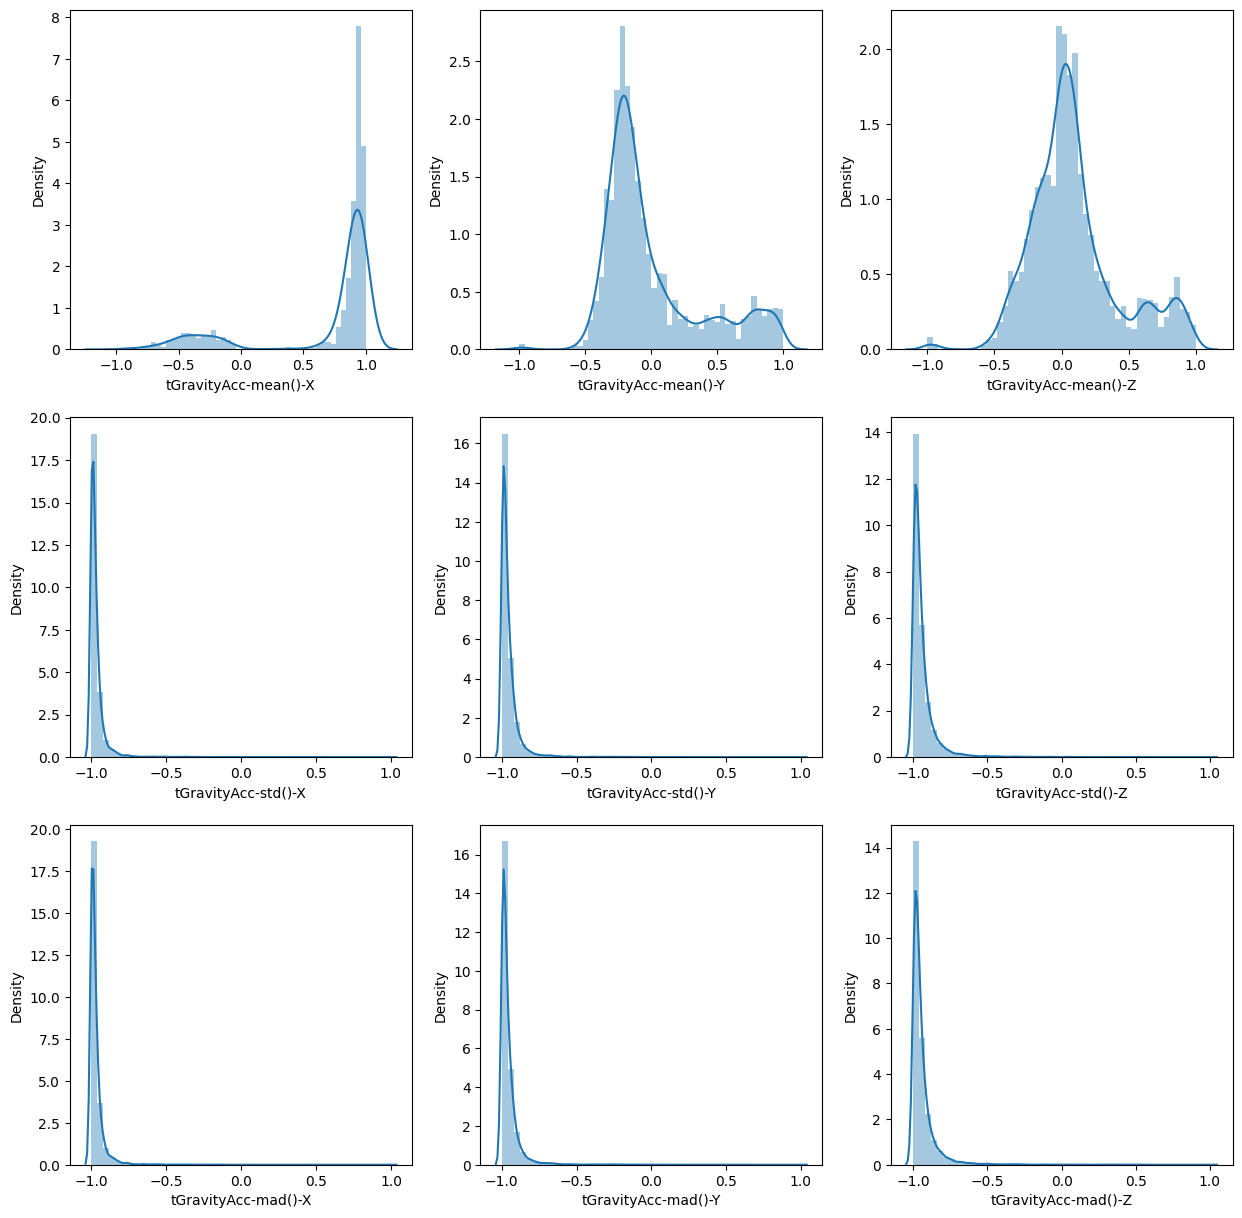

In [ ]:
cols = both_df.columns[40:49]
plot_distribution(both_df, cols)

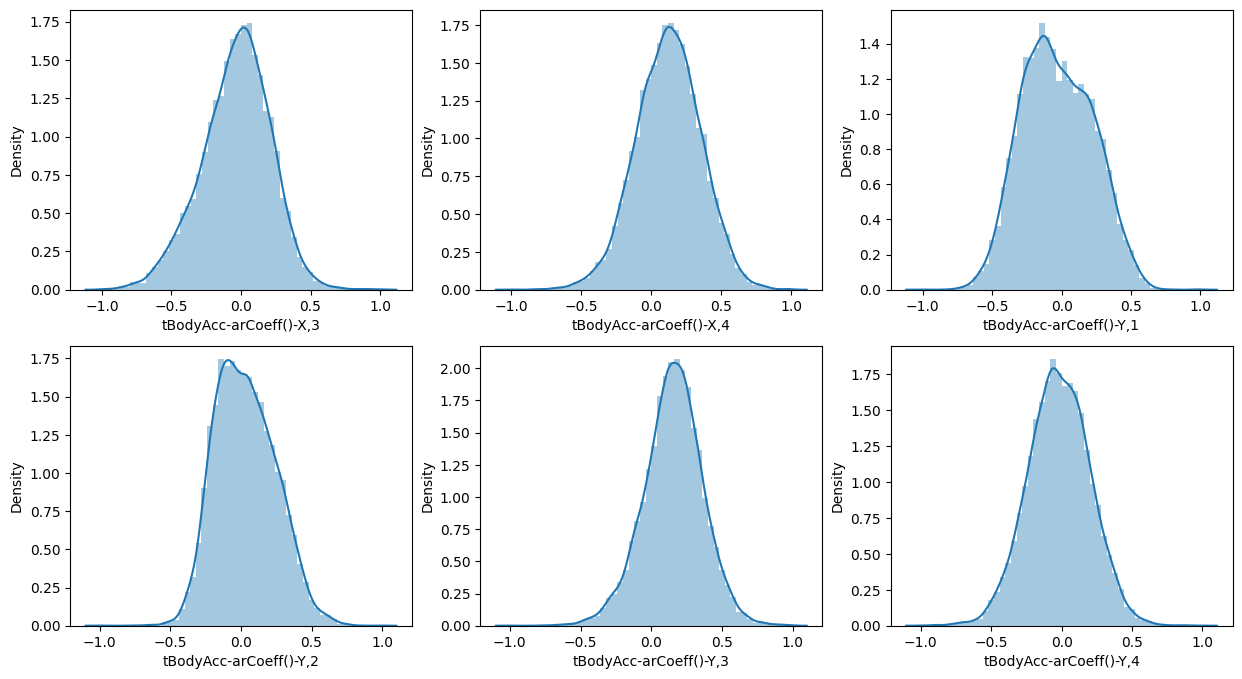

In [ ]:
cols = both_df.columns[27:34]
plot_distribution(both_df, cols)

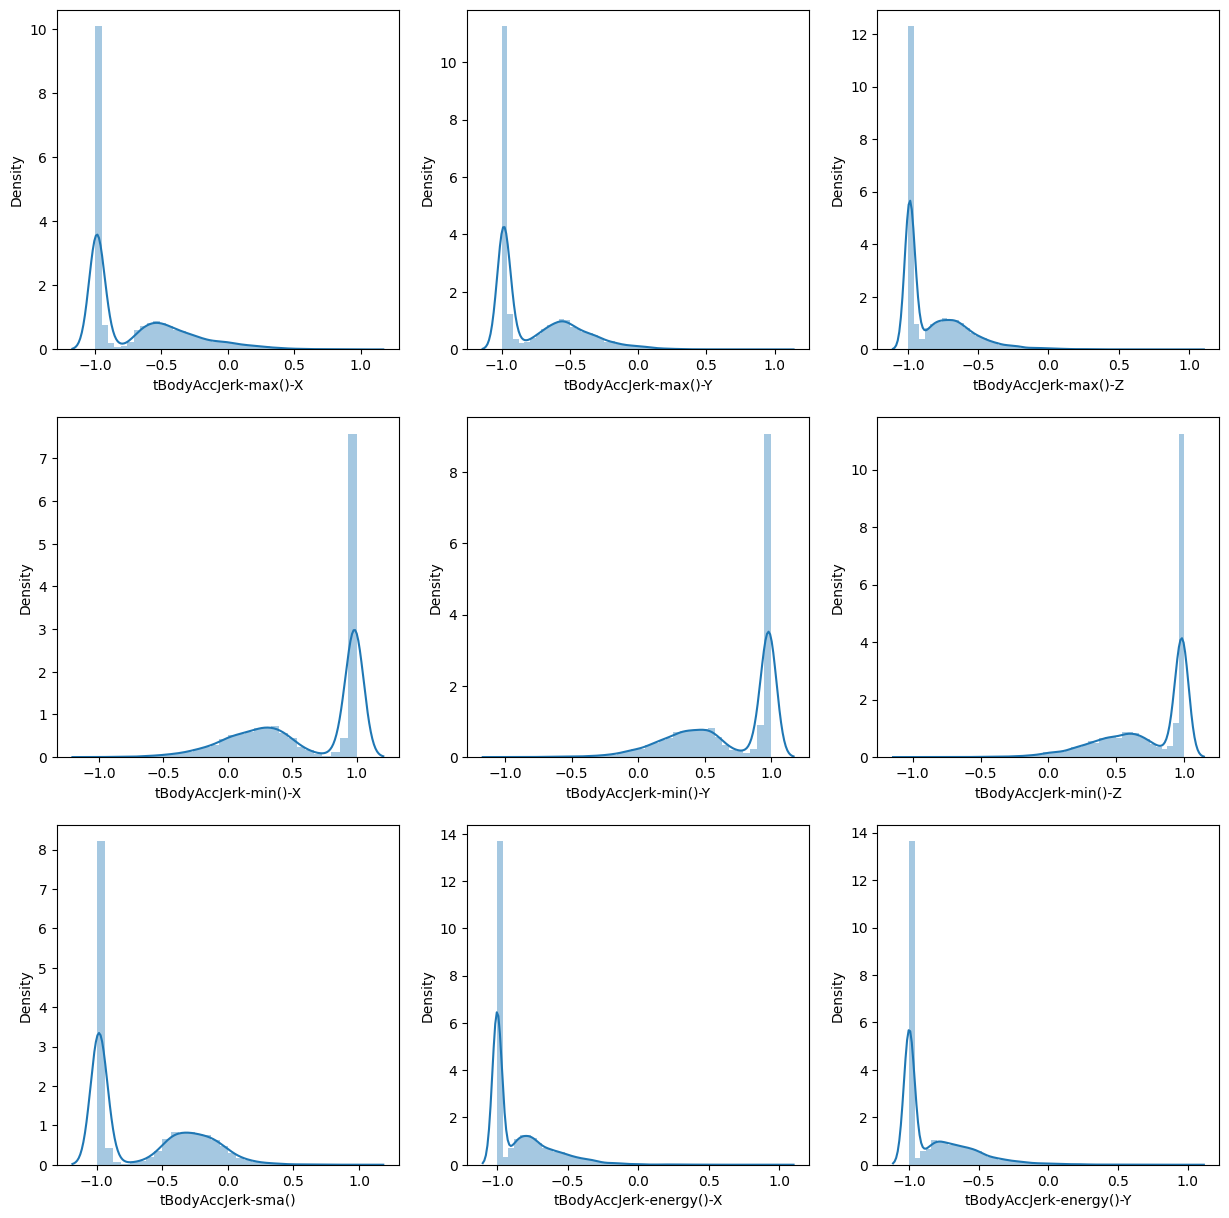

In [ ]:
cols = both_df.columns[89:98]
plot_distribution(both_df, cols)

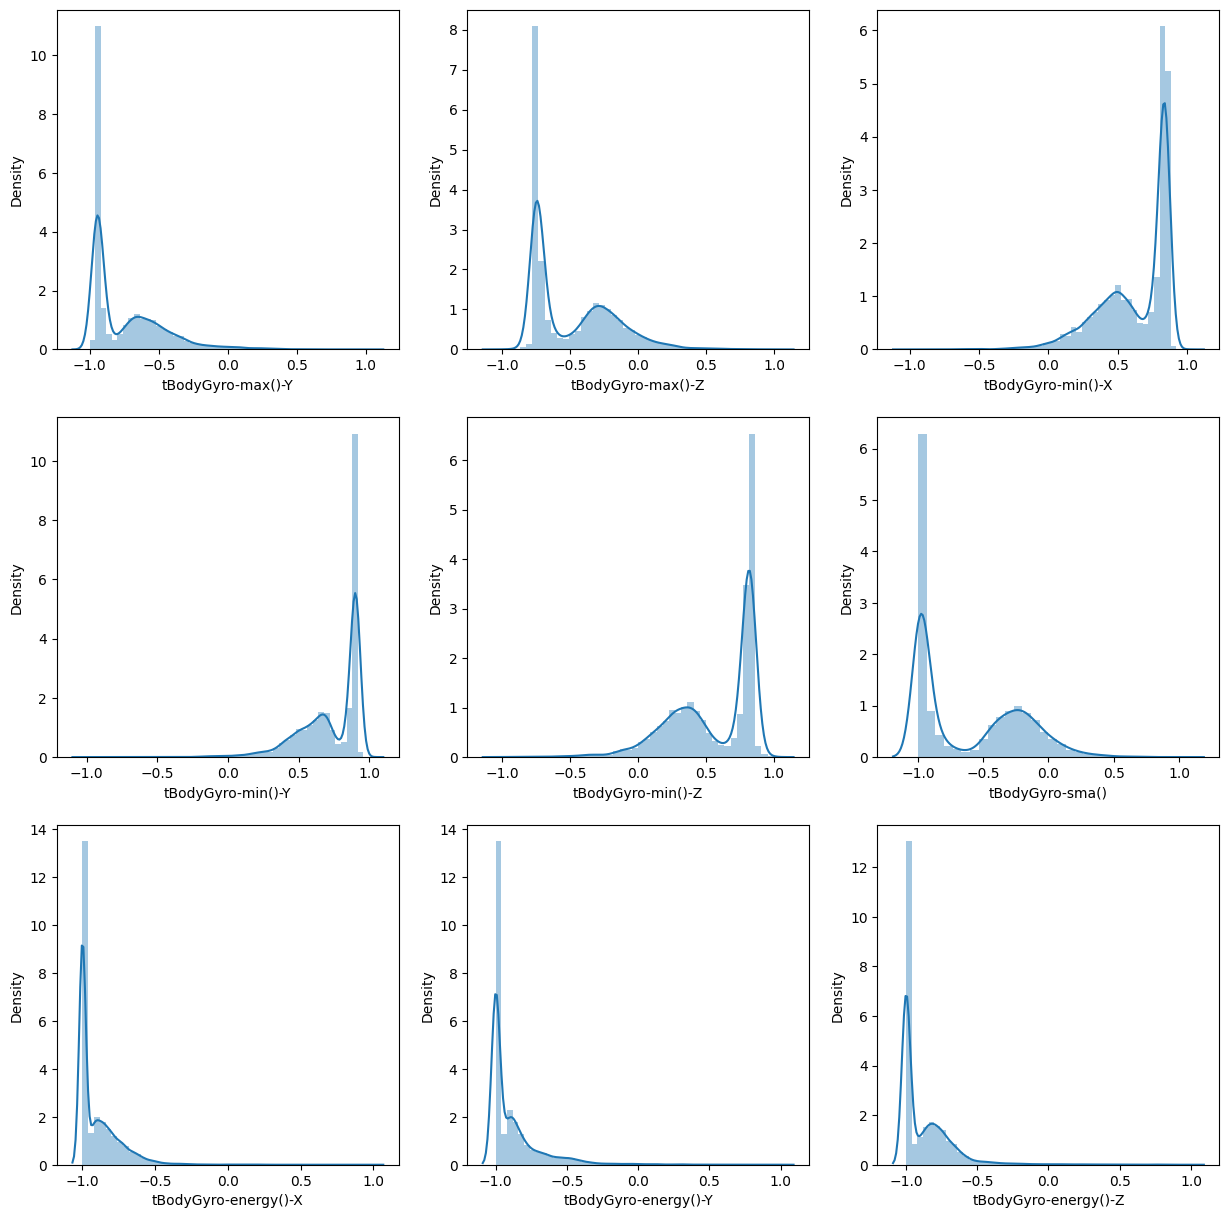

In [ ]:
cols = both_df.columns[130:139]
plot_distribution(both_df, cols)

In [ ]:
from sklearn.manifold import TSNE

def perform_tsne(x_train, y_train, perplexities, n_iter=1000):
    for index, per in enumerate (perplexities):
      X_reduced =TSNE(verbose=1, perplexity=per).fit_transform(x_train)
      df = pd.DataFrame({'x': X_reduced[:,0], 'y': X_reduced[:,1], 'label': y_train})
      print("Creating plot for TSNE visualization..")
      plt.figure(figsize=(7,7))
      sns.scatterplot(data=df, x='x', y='y', hue='label', fit_reg=False, palette="Set1",markers=['^','v','s','o', '1','2'])
      plt.title(f"Perplexity : {per} and max_iter: {n_iter}")
      plt.show()

[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.003s...
[t-SNE] Computed neighbors for 500 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.713189
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.529541
[t-SNE] KL divergence after 1000 iterations: 0.531654
Creating plot for TSNE visualization..
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.002s...
[t-SNE] Computed neighbors for 500 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 1.150101
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.889866
[t-SNE] KL divergence after 1000 iterations: 0.576262
Creating plot for TSNE visualization..
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.002s...
[t-SNE] Computed neighbors for 500 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 50

<Figure size 700x700 with 0 Axes>

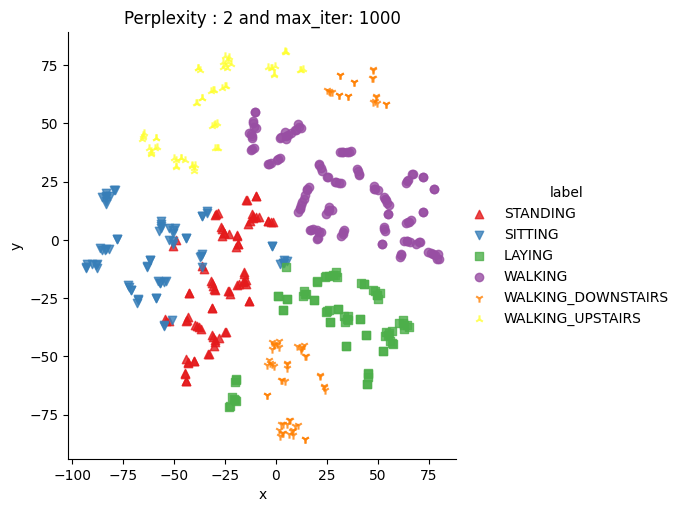

<Figure size 700x700 with 0 Axes>

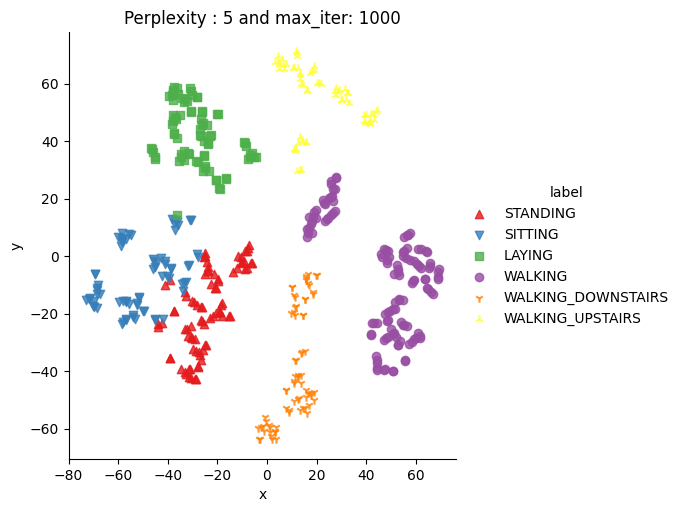

<Figure size 700x700 with 0 Axes>

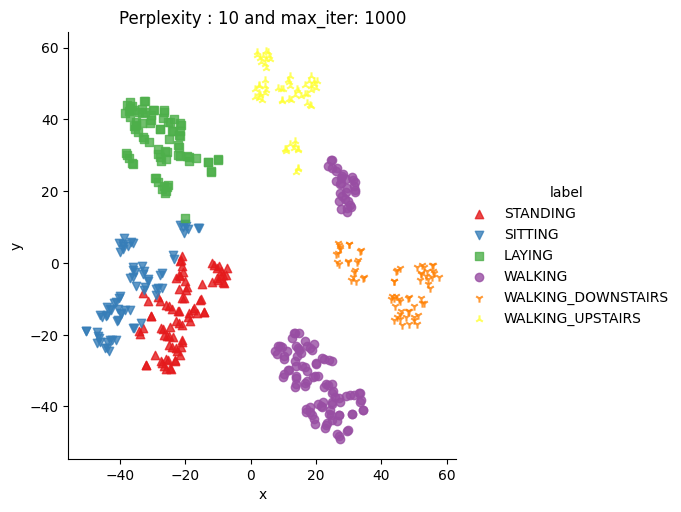

<Figure size 700x700 with 0 Axes>

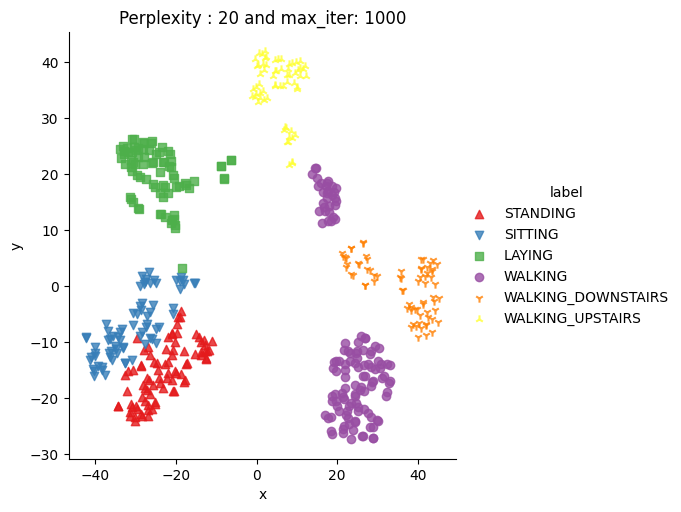

<Figure size 700x700 with 0 Axes>

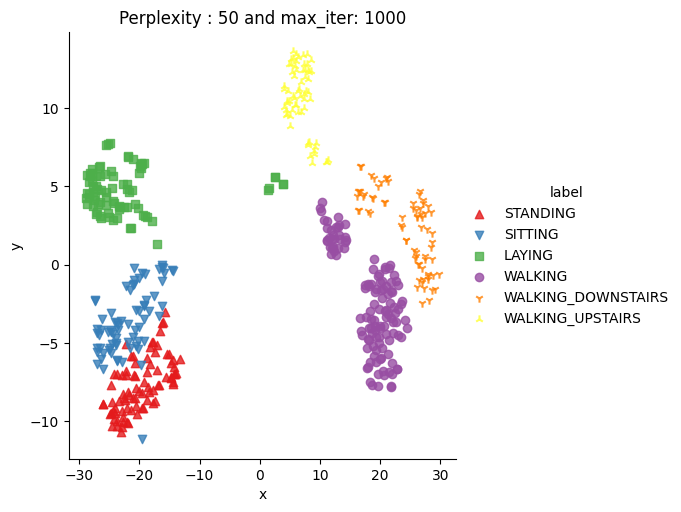

In [ ]:
perform_tsne(clean_df, label, perplexities=[2, 5, 10, 20, 50])

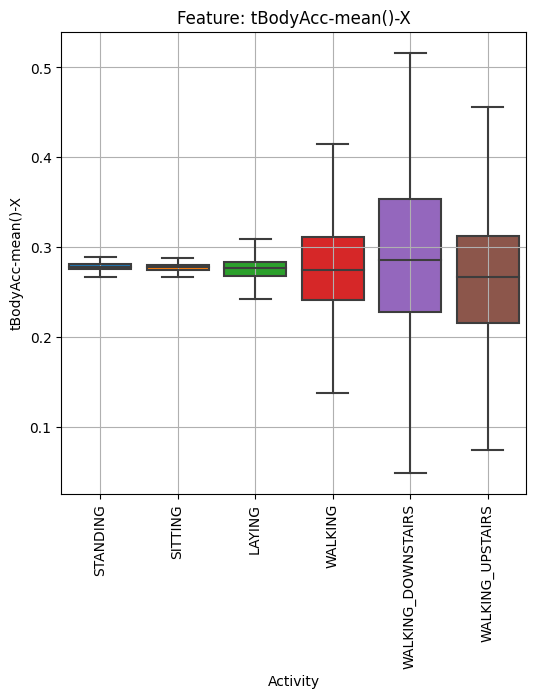

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x="Activity", y='tBodyAcc-mean()-X', data=both_df, showfliers=False, saturation=1)
plt.title("Feature: tBodyAcc-mean()-X")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x="Activity", y='tBodyAcc-mean()-X', data=both_df, showfliers=False, saturation=1)
plt.title("Feature: tBodyAcc-mean()")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
both_df.filter(like='Acc' , axis=1)


SyntaxError: ignored

ValueError: ignored

<Figure size 600x600 with 0 Axes>

In [ ]:
sns.pairplot(clean_df, hue="Activity", height=3)
plt.show()


KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7d7de6ed4ee0> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 168300x168300 with 17741 Axes>